In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15305 (delta 0), reused 1 (delta 0), pack-reused 15300
Receiving objects: 100% (15305/15305), 14.13 MiB | 1.83 MiB/s, done.
Resolving deltas: 100% (10497/10497), done.
/home/jupyter-vit_cse_bhargava/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu117 _CudaDeviceProperties(name='Quadro GV100', major=7, minor=0, total_memory=32499MB, multi_processor_count=80)


In [4]:
%cd /home/jupyter-vit_cse_bhargava/yolov5

/home/jupyter-vit_cse_bhargava/yolov5


In [12]:
cd 

/home/jupyter-vit_cse_bhargava


In [13]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [6]:
! mkdir ~/.kaggle

In [8]:
!cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
import kaggle

In [22]:
!kaggle datasets download -d siddharthkumarsah/plastic-bottles-image-dataset

/bin/bash: kaggle: command not found


In [24]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import pandas
import opendatasets as od

In [28]:
od.download("https://www.kaggle.com/datasets/siddharthkumarsah/plastic-bottles-image-dataset")

100%|██████████| 1.53G/1.53G [01:35<00:00, 17.2MB/s]


In [29]:
cd plastic-bottles-image-dataset

/home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset


In [32]:
# define number of classes based on YAML
import yaml
with open('/home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset/pbid' + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [33]:
%cat /home/jupyter-vit_cse_bhargava/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [34]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))
     

In [38]:
%%writetemplate /home/jupyter-vit_cse_bhargava/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [52]:
# train yolov5s on custom data for 100 epochs
# time its performance
%time
%cd /home/jupyter-vit_cse_bhargava/yolov5/
!python train.py --img 416 --batch 16 --epochs 3 --data /home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset/pbid/data.yaml --cfg /home/jupyter-vit_cse_bhargava/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_re

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 19.6 µs
/home/jupyter-vit_cse_bhargava/yolov5
2023-03-17 14:39:55.763524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 14:39:56.857226: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jupyter-vit_cse_bhargava/.local/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-17 14:39:56.857315: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open s

In [63]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


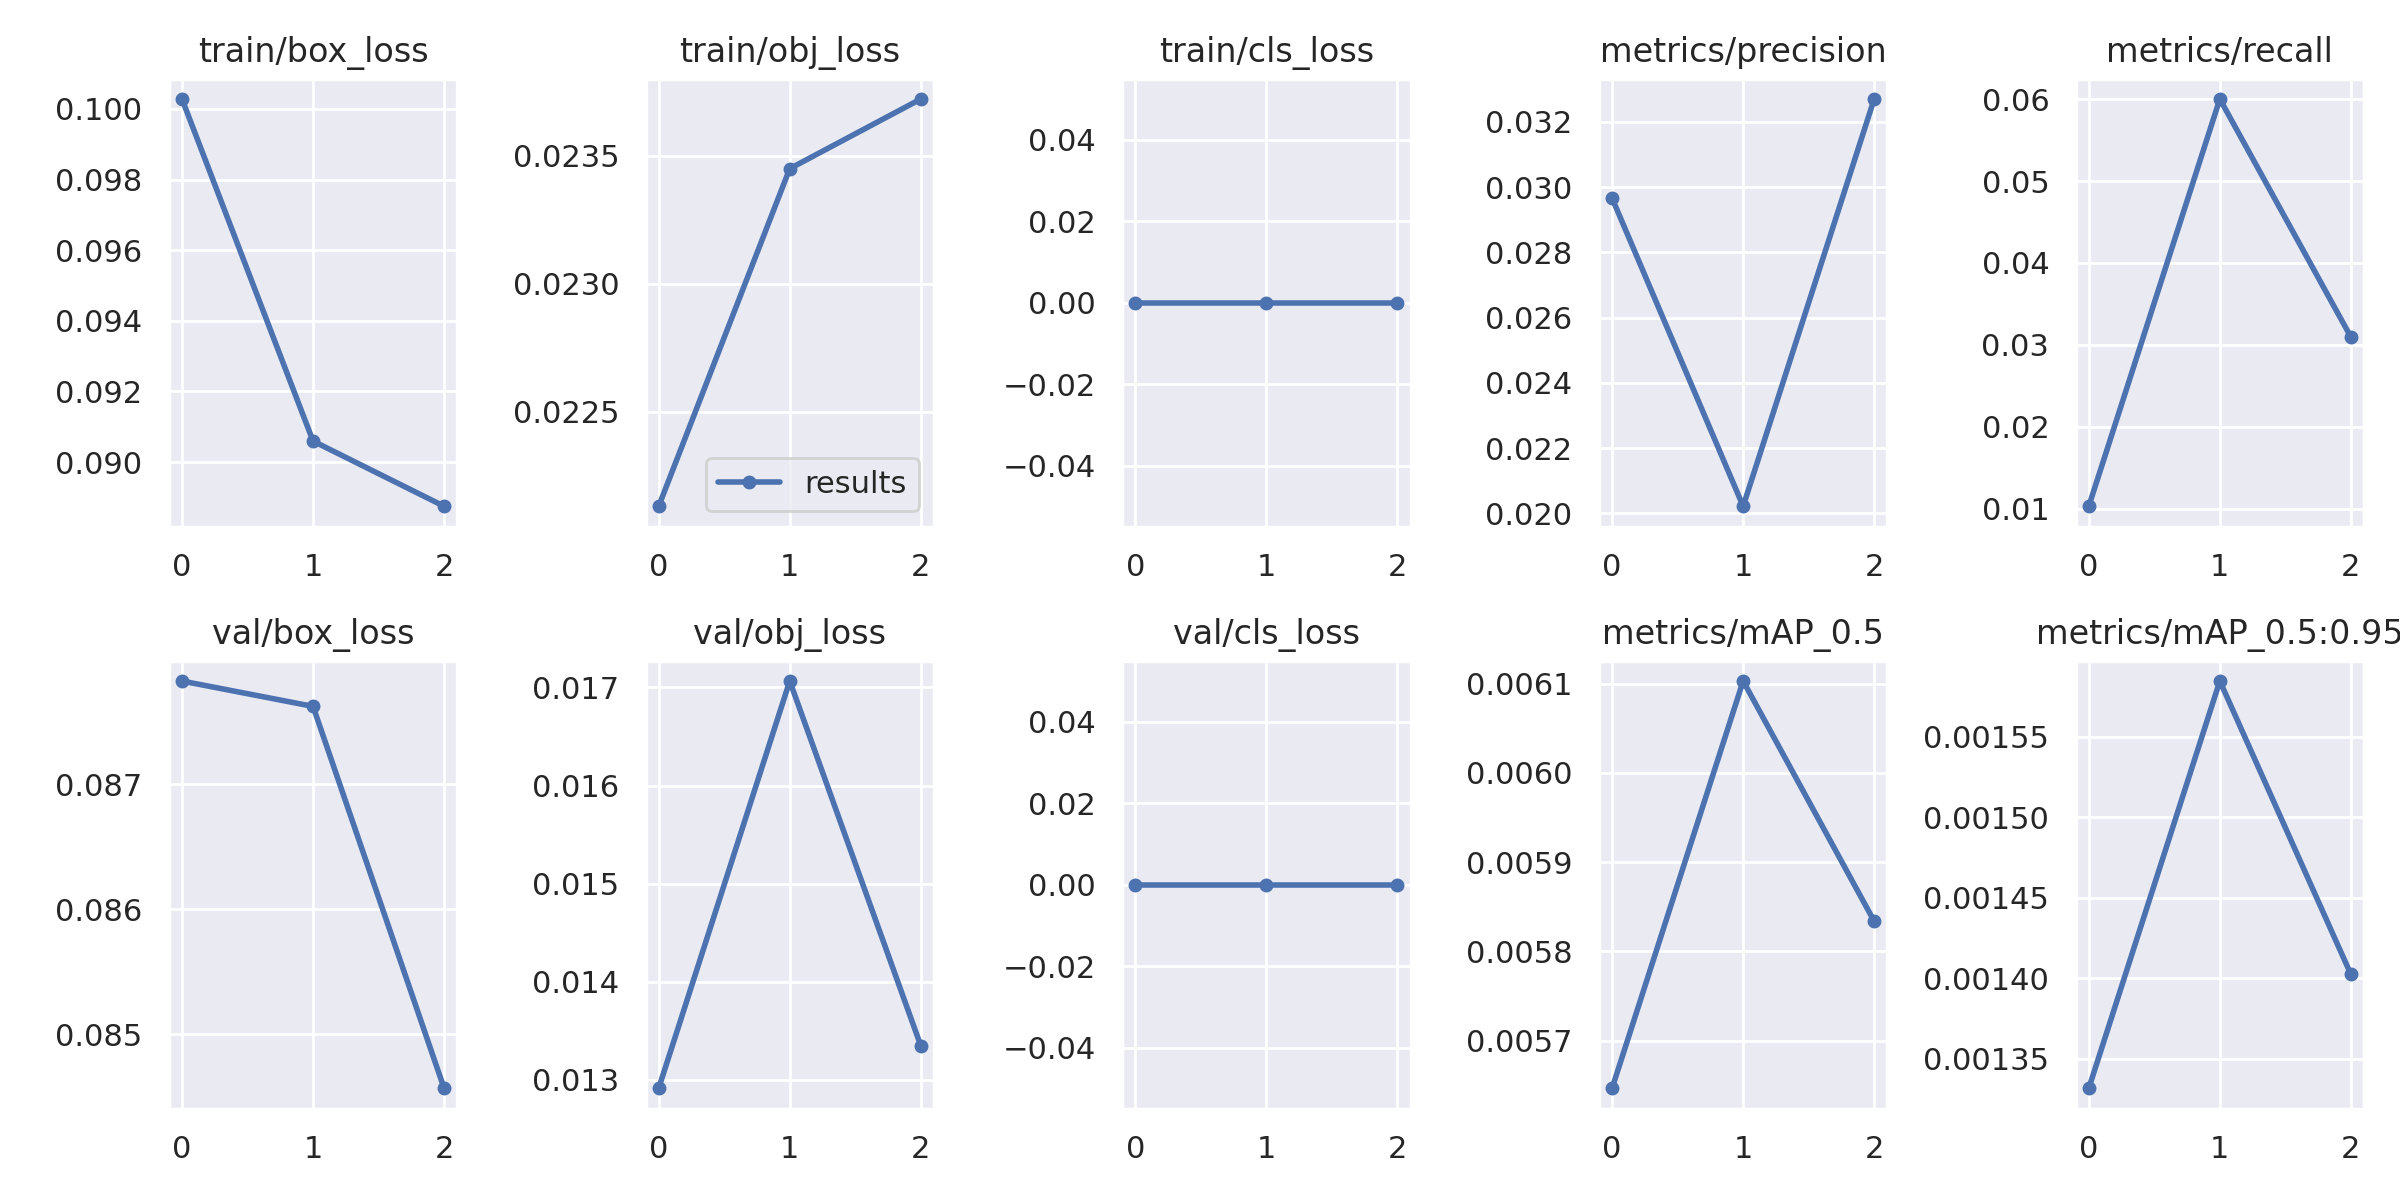

In [54]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


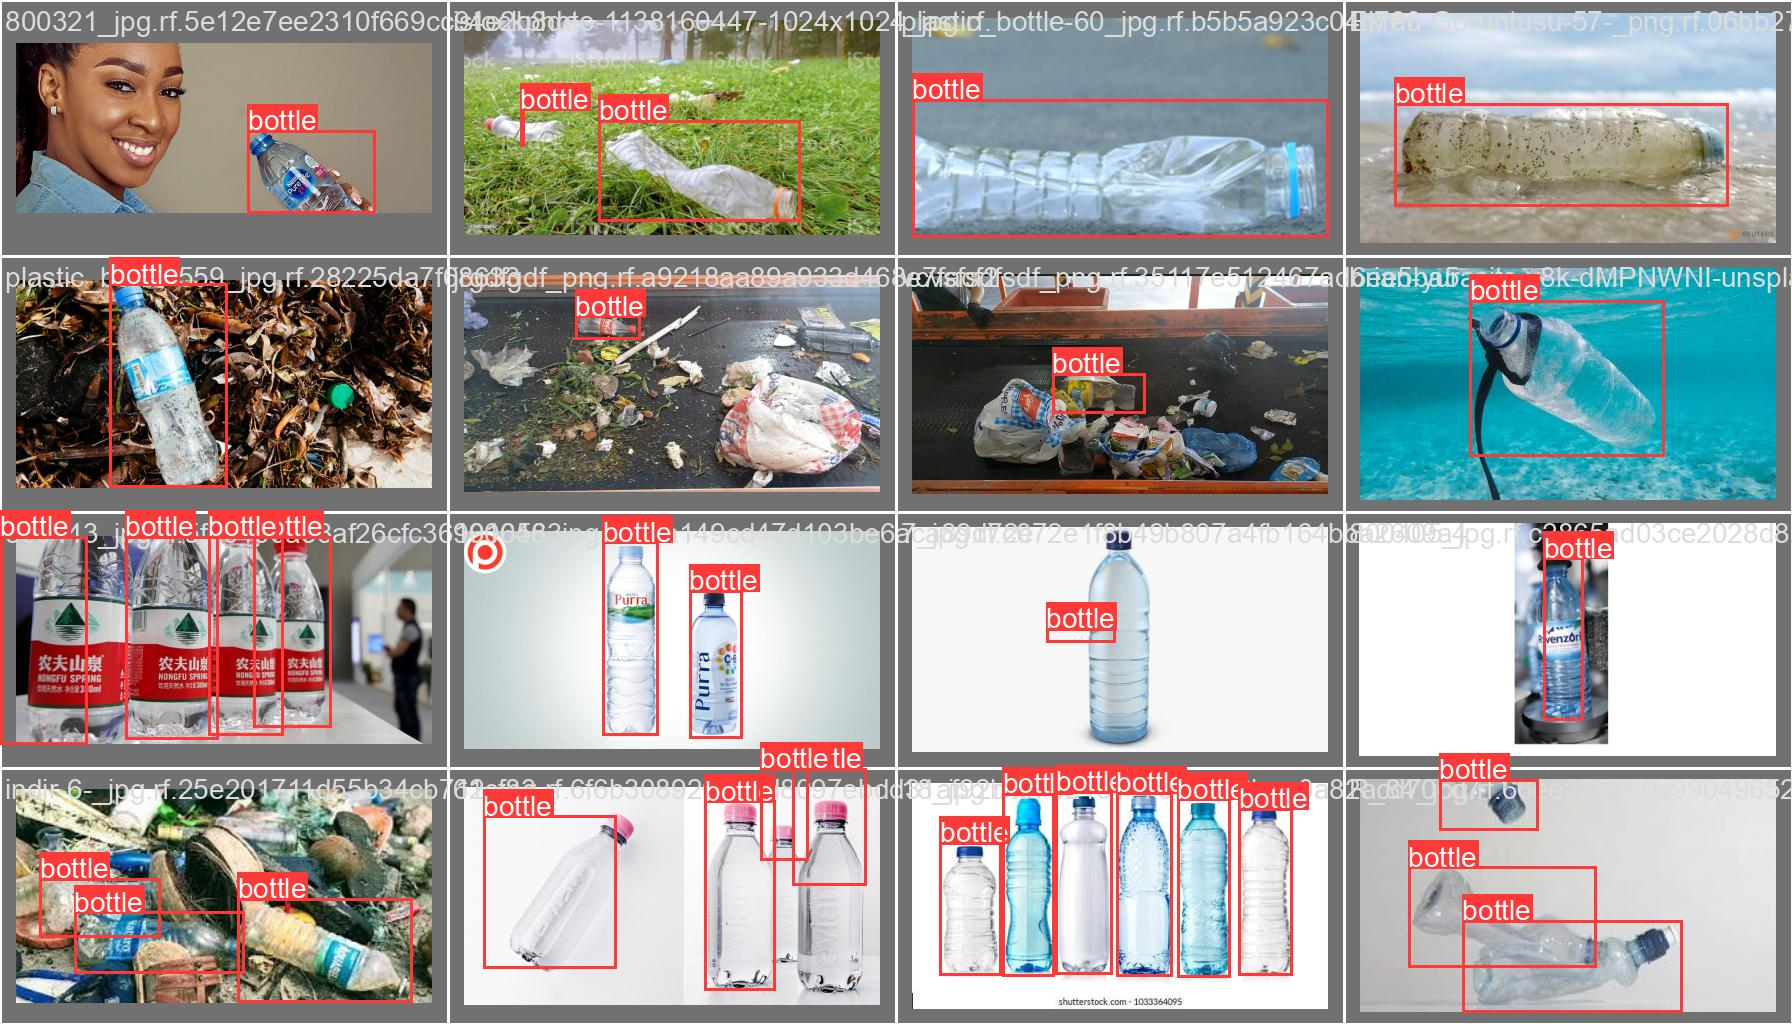

In [56]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


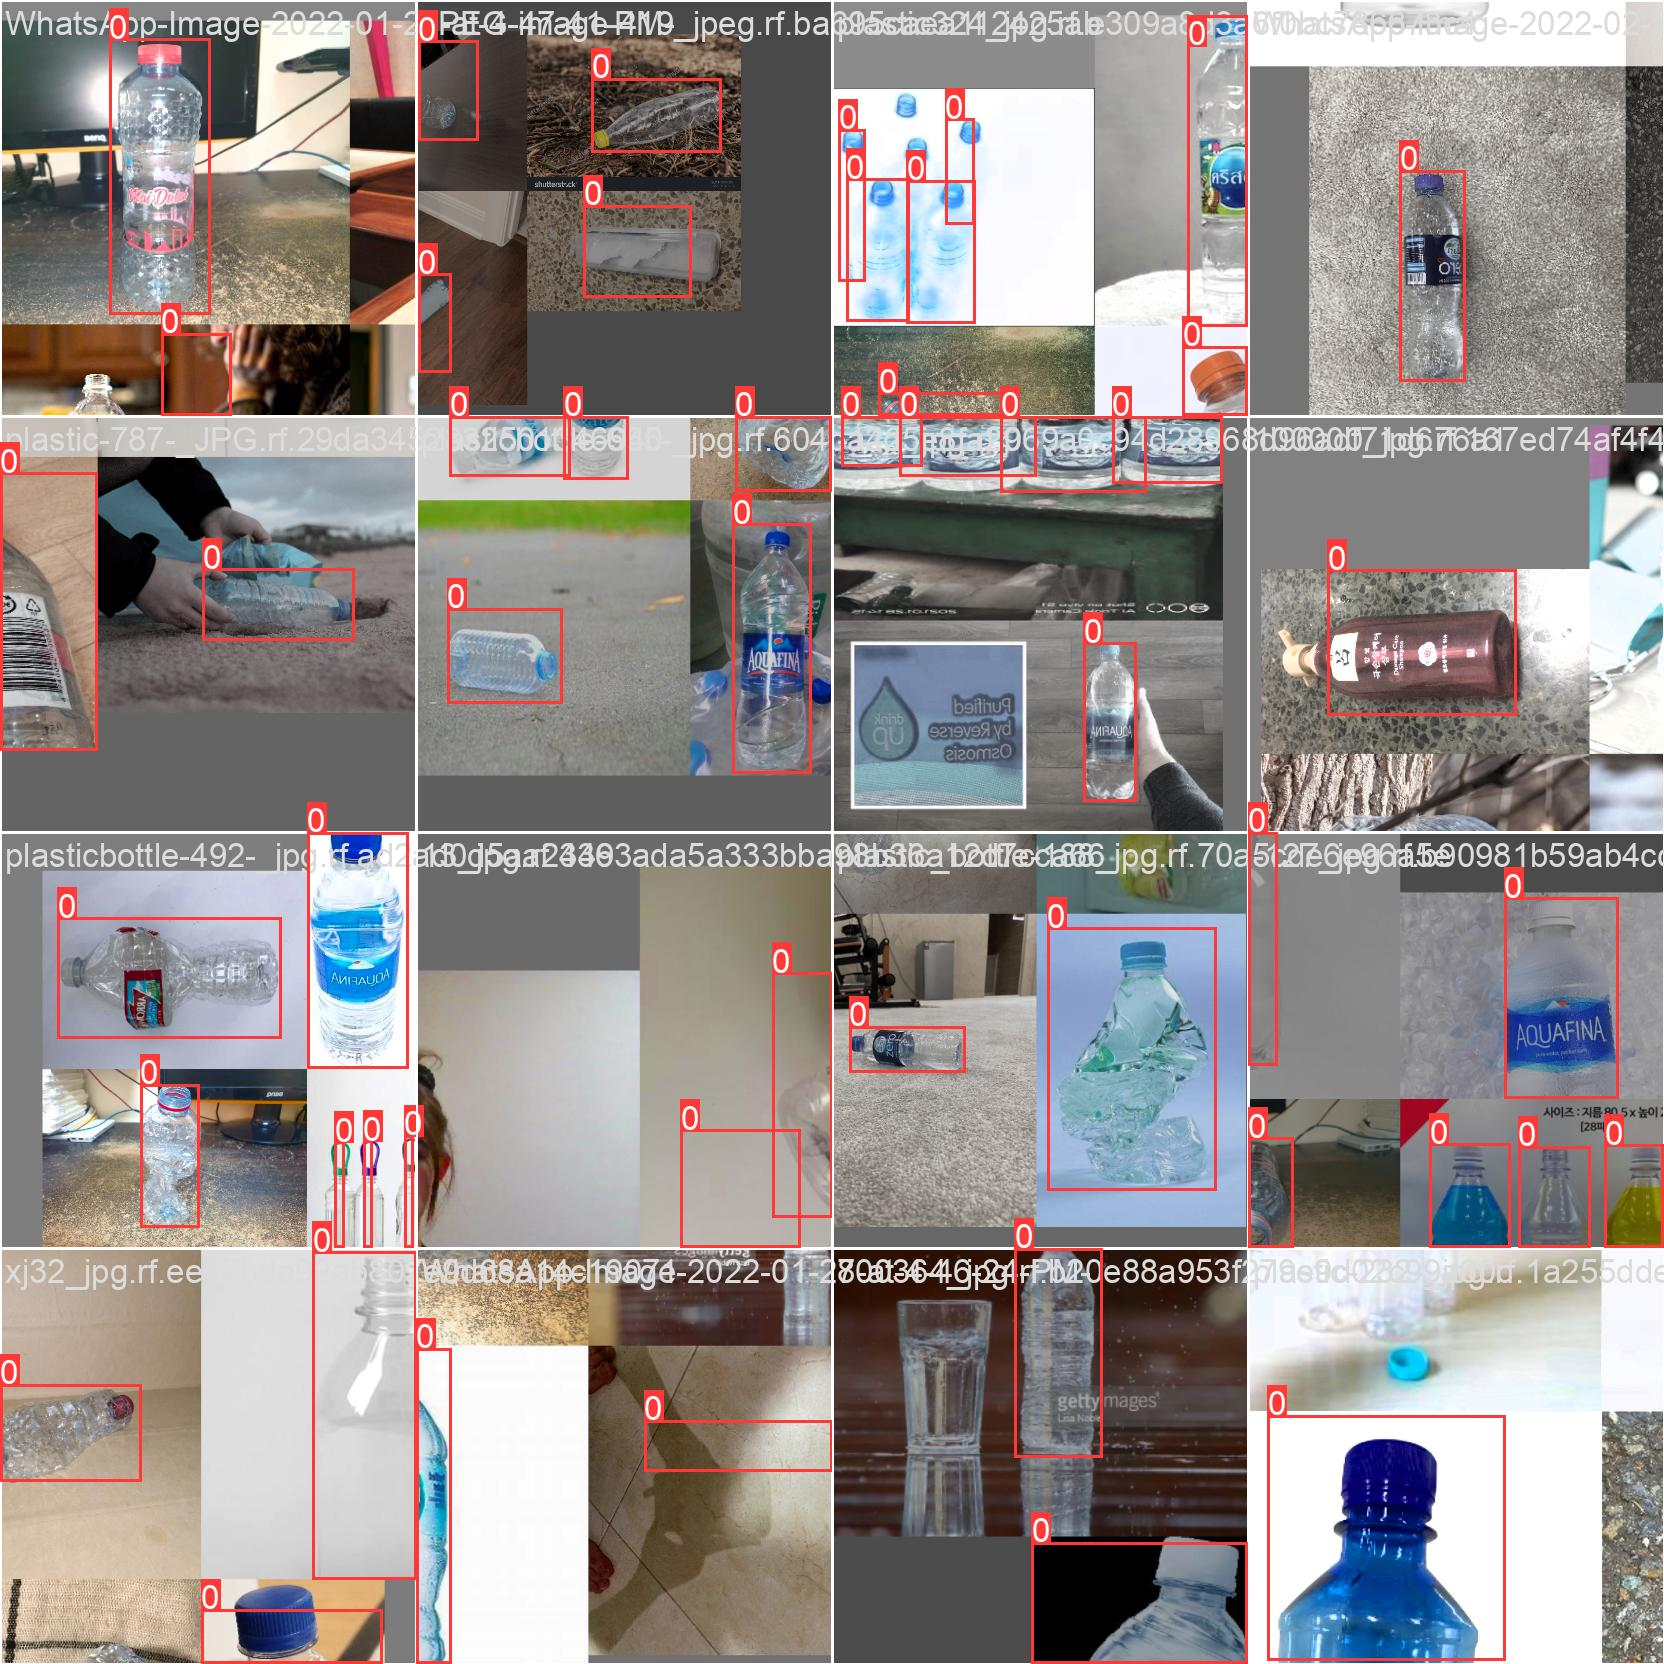

In [57]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/train_batch0.jpg', width=900)

In [58]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [60]:
%ls runs/train/yolov5s_re3/weights

best.pt  last.pt


In [62]:
!python detect.py --weights runs/train/yolov5s_re3/weights/best.pt --img 416 --conf 0.4 --source /home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset/pbid/valid/images

[Errno 2] No such file or directory: '/content/yolov5/'
/home/jupyter-vit_cse_bhargava/yolov5
detect: weights=['runs/train/yolov5s_re3/weights/best.pt'], source=/home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset/pbid/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (Quadro GV100, 32500MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
image 1/1174 /home/jupyter-vit_cse_bhargava/plastic-bottles-image-dataset/pbid/valid/images/-105_jpg.rf.393af51c4cab0d35178c59b4ac385723.jpg: 416x416 (no detections), 6.1ms
image 2/1174 /ho

In [2]:
!pip install rembg

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install easygui

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 92 kB 304 kB/s            


In [5]:
from rembg import remove
from PIL import Image
import easygui as eg


In [6]:
input_path = eg.fileopenbox(title='11.jpg')
output_path = eg.filesavebox(title='rm.jpg')
input = Image.open(input_path)
output = remove(input)
output.save(output_path)

TclError: no display name and no $DISPLAY environment variable